### Student Information
Name: Fernando Vielman

Student ID: 114065423

GitHub ID: 232552840

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') 
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import plotly as px
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ferchis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ferchis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
#Importing the library
reddit_csv = "newdataset\Reddit-stock-sentiment.csv"
reddit_DF_csv = pd.read_csv(reddit_csv)

#Exercise 1 
print("This is exercise 1: " "\n")

for t in range(3):  
    print(f"Example {t+1}")
    print(reddit_DF_csv.loc[t]) 
    print("-" * 80)  # Separate each example


This is exercise 1: 

Example 1
type                                                    comment
datetime                                    2025-04-11 17:29:56
post_id                                                 mmli62w
subreddit                                        wallstreetbets
title           Retardation is on the menu boys! WSB is so back
author                                             StickyTip420
url                        https://i.redd.it/0yq2ftren8ue1.jpeg
upvotes                                                       0
downvotes                                                   NaN
upvote_ratio                                                NaN
text                                           Calls on retards
subjectivity                                                1.0
polarity                                                   -0.9
sentiment                                                  -1.0
entities                                                     []
label   

In [3]:
 #Converting dictionary into panda dataframe

reddit_DF = pd.DataFrame(reddit_DF_csv['type'], columns=['type'])

#Adding the relevant columns. Columns not included, such as author, were not added because I thought they were irrelevant. Reasoning below.

reddit_DF['text'] = reddit_DF_csv['text']
reddit_DF['subjectivity'] = reddit_DF_csv['subjectivity']
reddit_DF['polarity'] = reddit_DF_csv['polarity']
reddit_DF['sentiment'] = reddit_DF_csv['sentiment']
reddit_DF['label'] = reddit_DF_csv['label']

# Not included columns: datetime, post_id, subreddit, title, author, url, upvotes, downvotes, upvote_ratio, entities. All of them are either irrelevant, reduntant, or would just 
# bloat the dataframe. For example, author would bloat the dataframe since each post/comment should have different authors.

#Testing it works on the first 10 
reddit_DF[0:10]

,type,text,subjectivity,polarity,sentiment,label
0,comment,Calls on retards,1.000000,-0.900000,-1.0,-1.0
1,comment,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0
2,comment,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0
4,comment,He didn’t say thank you.,0.000000,0.000000,0.0,-1.0
5,comment,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,0.0
6,comment,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,-1.0
7,comment,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,0.0
8,comment,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,1.0
9,comment,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,1.0


In [4]:
#Exercise 2

print("This is exercise 2: " "\n")

reddit_DF.query("type == 'post'")

#Decided to use .query since this method was not used to query on the master file. Only selected the 'post' types. 

This is exercise 2: 



,type,text,subjectivity,polarity,sentiment,label
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0
48,post,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,0.0
63,post,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,0.0
70,post,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,0.0
72,post,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,0.0
...,...,...,...,...,...,...
783,post,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,0.0
786,post,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,0.0
802,post,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,0.0
836,post,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,0.0


In [5]:
#Exercise 3

#Only change is that I chose fetch the records belonging to the post category. 

print("This is exercise 3: " "\n")

reddit_DF[reddit_DF["type"] == "post"][::10][0:5]

This is exercise 3: 



,type,text,subjectivity,polarity,sentiment,label
3,post,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,1.0
165,post,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,0.0
332,post,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,1.0
421,post,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,0.0
487,post,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,0.0


In [6]:
#Checking if there is any missing value

import helpers.data_mining_helpers as dmh

reddit_DF.isnull().apply(lambda reddit_DF: dmh.check_missing_values(reddit_DF))

#No missing values on this dataframe. 


,type,text,subjectivity,polarity,sentiment,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0


In [7]:
#Exercise 4

print("This is exercise 4: " "\n")

reddit_DF.isnull().apply(lambda reddit_DF: dmh.check_missing_values(reddit_DF), axis = 1)


This is exercise 4: 



0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [8]:
reddit_DF.dropna(inplace=True) #Adding a way to remove the missing values. Even if the file does not have any, its good to future proof.

print("There are now:" , sum(reddit_DF.duplicated()), "duplicates in this dataframe") #Right now there are 23 duplicated values. 

reddit_DF.drop_duplicates(keep=False, inplace=True)

print("There are now:" , sum(reddit_DF.duplicated()), "duplicates in this dataframe") #Now there are none.



There are now: 23 duplicates in this dataframe
There are now: 0 duplicates in this dataframe


<Axes: title={'center': 'Sentiment distribution of the entire dataframe'}, xlabel='sentiment'>

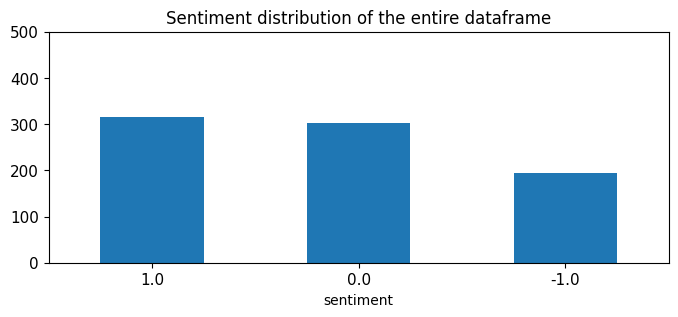

In [9]:
#Sampling due to the density of the 'text' records.

len(reddit_DF) #Exactly 813 records. 

reddit_DF_sample = reddit_DF.sample(n=400) #Picked 400 because its about half. 

import matplotlib.pyplot as plt

#Ploting the entire dataframe

reddit_DF.sentiment.value_counts().plot(kind = 'bar', #Chose a bar-graph to show the difference in the records between the amount of positive, neutral, and negative sentiments. 
                                    title = 'Sentiment distribution of the entire dataframe',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))



<Axes: title={'center': 'Sentiment distribution of the entire dataframe'}, xlabel='sentiment'>

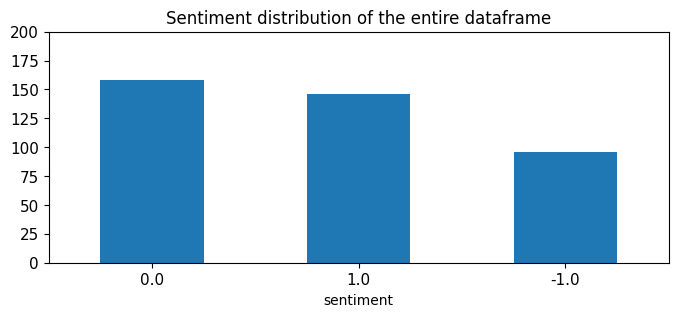

In [10]:
#Ploting the sample dataframe. Did it on a separate code cell so I could display both graphs.

reddit_DF_sample.sentiment.value_counts().plot(kind = 'bar', 
                                    title = 'Sentiment distribution of the entire dataframe',
                                    ylim = [0, 200],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


This is exercise 7: 



<Axes: title={'center': 'Sentiment distribution of the entire dataframe'}, xlabel='sentiment'>

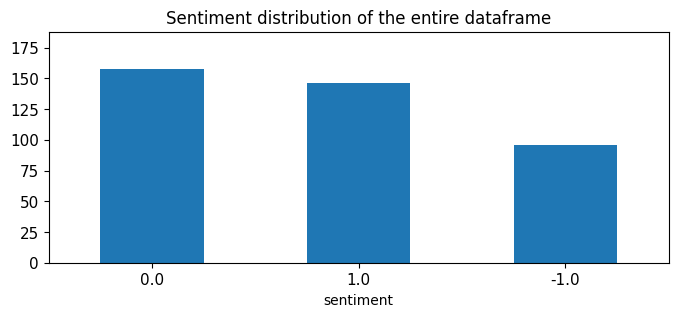

In [11]:
#Exercise 7, skipped 5 and 6 because they were unnecesary. 

print("This is exercise 7: " "\n")

reddit_DF_sample.sentiment.value_counts().plot(kind = 'bar', 
                                    title = 'Sentiment distribution of the entire dataframe',
                                    ylim = [0, reddit_DF_sample.sentiment.value_counts().max()+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

This is exercise 8: 



<Axes: title={'center': 'Category Distribution Comparison'}, xlabel='sentiment'>

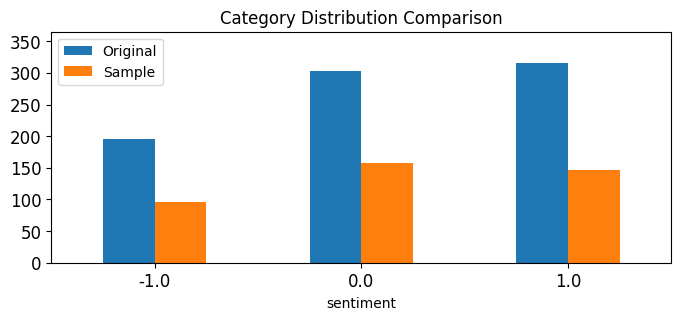

In [12]:
#Exercise 8 

print("This is exercise 8: " "\n")


all_vs_sample = (pd.DataFrame({
    'Original': reddit_DF.sentiment.value_counts(), 
    'Sample': reddit_DF_sample.sentiment.value_counts()})
)

all_vs_sample.plot(kind='bar',
                   title= "Category Distribution Comparison" ,
                   ylim= [0, reddit_DF.sentiment.value_counts().max()+50], # I use the original size since its going to have a larger data set. 
                   rot = 0, fontsize = 12, figsize = (8,3)
)

In [13]:
reddit_DF['unigrams'] = reddit_DF['text'].apply(lambda x: dmh.tokenize_text(x)) #Convert all the text column into unigrams/tokens. This is a step in order to create a document term-matrix. 
reddit_DF[0:4]  # Check the new column created with all the unigrams from all the text per line. 

,type,text,subjectivity,polarity,sentiment,label,unigrams
0,comment,Calls on retards,1.000000,-0.900000,-1.0,-1.0,"[Calls, on, retards]"
1,comment,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
reddit_DF_Vectorizer = count_vect.fit_transform(reddit_DF.text) 
print(reddit_DF_Vectorizer[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [15]:
count_vect.get_feature_names_out()[0:25] #Just testing how the array looks.

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100',
       '1000', '10000', '100k', '100x', '10k', '10ks', '10yr', '11',
       '116', '118', '12', '1242', '125', '12855584', '13'], dtype=object)

In [16]:
# Exercise 9

print("This is exercise 9: " "\n")

analyze = count_vect.build_analyzer()
analyze(reddit_DF.text[0])

This is exercise 9: 



['calls', 'on', 'retards']

In [17]:
reddit_DF_Vectorizer[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [18]:
# Exercise 10
# Since there is not a 1 on this array, I will be looking into the 3 that appears on the 4th record. 
print("This is exercise 10: " "\n")

print(count_vect.get_feature_names_out()[19:20])

This is exercise 10: 

['118']


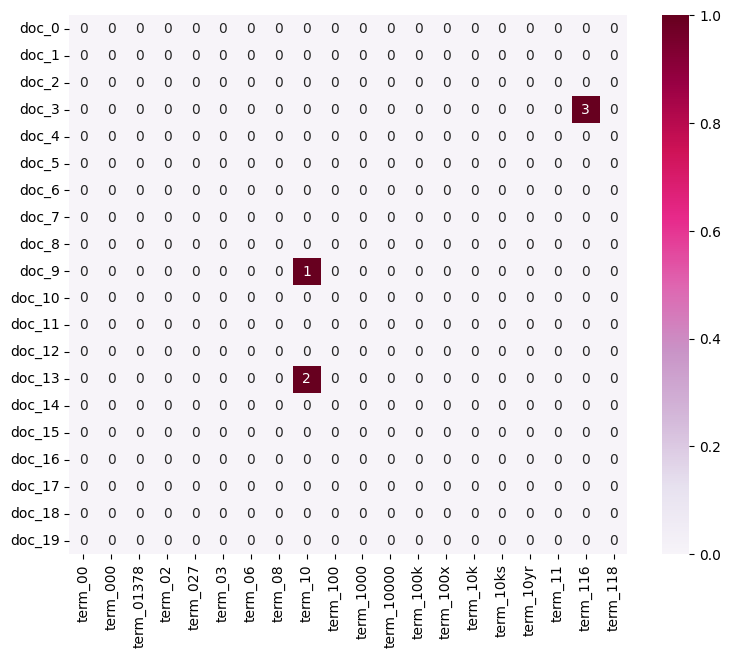

In [19]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]] #Chose 20 because its the same as the Master file. 
plot_y = ["doc_"+ str(i) for i in list(reddit_DF.index)[0:20]]
plot_z = reddit_DF_Vectorizer[0:20, 0:20].toarray() 

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# This heatmap does not have a lot of information and is very abstract, next exercise it will improve. 

This is exercise 11: 



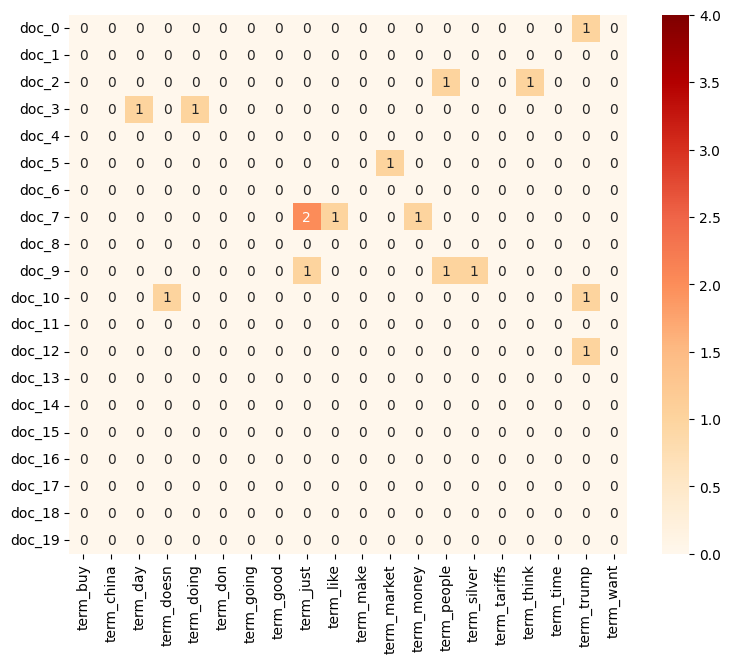

In [20]:
# Exercise 11

print("This is exercise 11: " "\n")

count_vect_heatmap = CountVectorizer(
    max_features= 20,            #Using the top 20 terms that are most frequent in the data
    stop_words= 'english',      #Removing all stops words from the english language, only having words that are relevant
) 
reddit_DF_sample_heatmap = count_vect_heatmap.fit_transform(reddit_DF_sample.text) #Only taking account the sample size, since its smaller its faster to compute

plot_x_heatmap = ["term_"+str(i) for i in count_vect_heatmap.get_feature_names_out()[0:20]] 
plot_y_heatmap = ["doc_"+ str(i) for i in list(reddit_DF.index)[0:20]]
plot_z_heatmap = reddit_DF_sample_heatmap[0:20].toarray() 


df_todraw = pd.DataFrame(plot_z_heatmap, columns =
plot_x_heatmap, index = plot_y_heatmap)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd", 
                 vmin=0, vmax=4, annot=True) 

# Now we can see what the heatmap is more useful, only showing the most frequent 20 terms in the first 20 documents. 



C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16128\3287195795.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


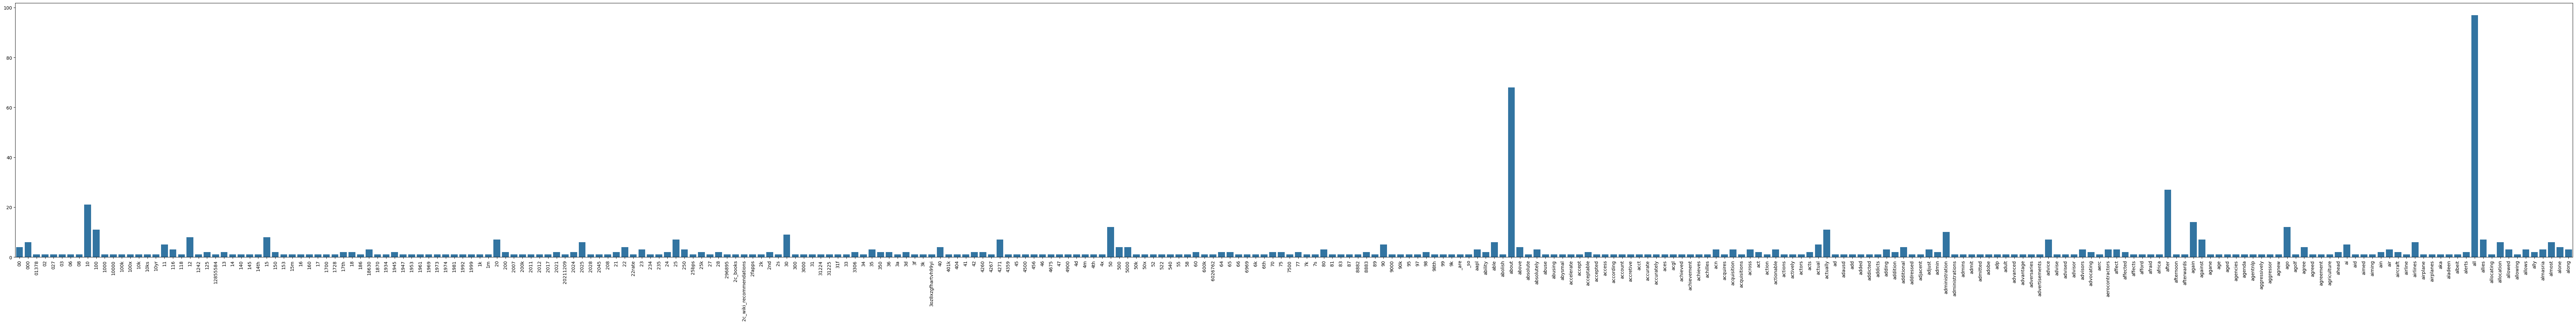

In [21]:
term_frequencies = []
for j in range(0,reddit_DF_Vectorizer.shape[1]):
    term_frequencies.append(sum(reddit_DF_Vectorizer[:,j].toarray()))

term_frequencies = np.asarray(reddit_DF_Vectorizer.sum(axis=0))[0]

term_frequencies[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [22]:
# Exercise 12

print("This is exercise 12: " "\n")

import plotly.express as px #Normal plotly was not running.

bar = pd.DataFrame({
    "Term": ["term_"+str(i) for i in count_vect.get_feature_names_out()[:300]] ,
    "Frequency": term_frequencies[:300]
})

fig = px.bar(
    bar, 
    x="Term", 
    y="Frequency", 
    title="First 300 Term Frequencies",
    width=3000,   
    height=1000
)

fig.show()

This is exercise 12: 



This is exercise 13: 



C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16128\3449743787.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16128\3449743787.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



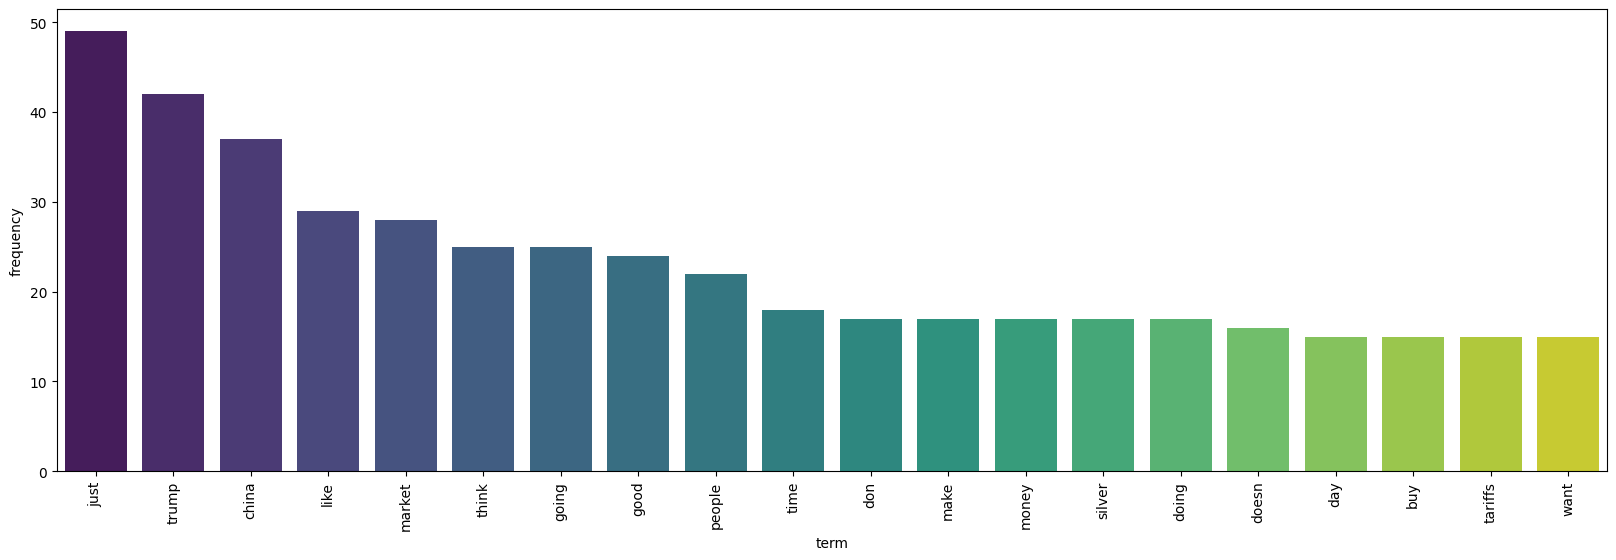

In [23]:
# Exercise 13

print("This is exercise 13: " "\n")

term_frequencies_reddit = np.asarray(reddit_DF_sample_heatmap.sum(axis=0))[0]

terms = count_vect_heatmap.get_feature_names_out()

DF_test = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies_reddit
})

DF_test = DF_test.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(
    data=DF_test, 
    x="term", 
    y="frequency" ,
    palette="viridis"
).set_xticklabels(DF_test["term"], rotation=90)
plt.show()



This is exercise 14: 



C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16128\1175752387.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16128\1175752387.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



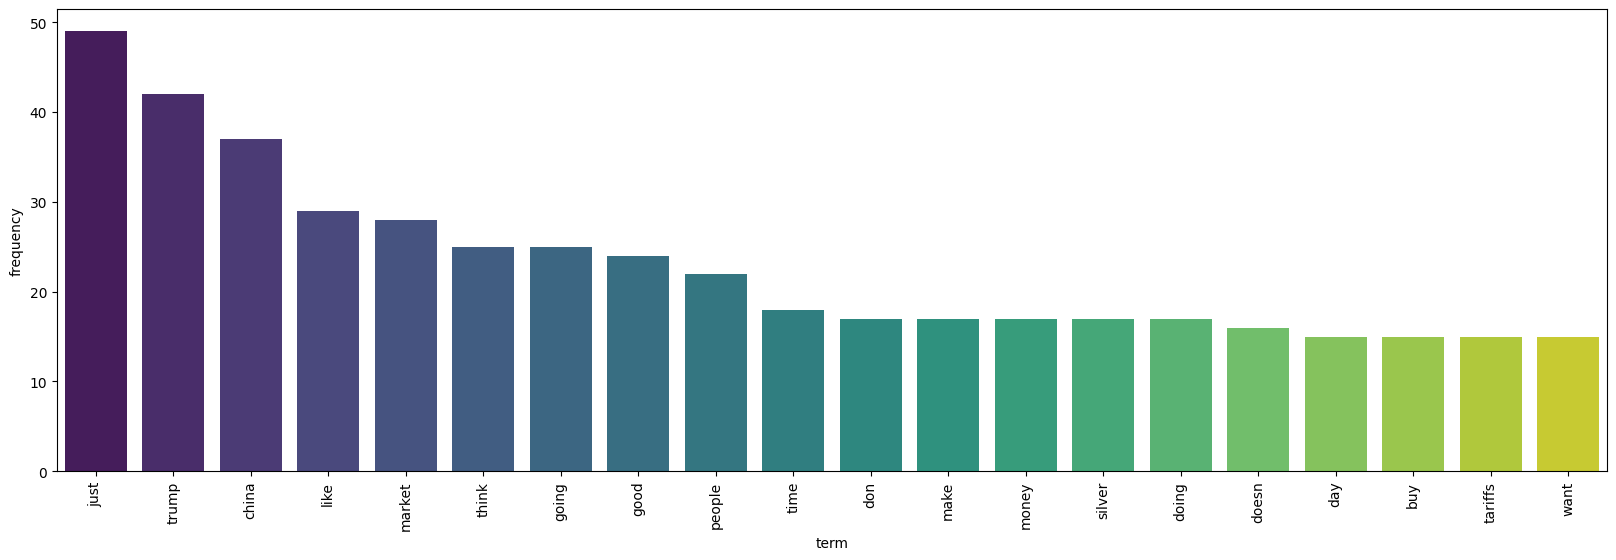

In [24]:
# Exercise 14

print("This is exercise 14: " "\n")

term_frequencies_test = np.asarray(reddit_DF_sample_heatmap.sum(axis=0))[0]

terms = count_vect_heatmap.get_feature_names_out()

DF_test = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies_test
})

DF_test = DF_test.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(
    data=DF_test, 
    x="term", 
    y="frequency" ,
    palette="viridis"
).set_xticklabels(DF_test["term"], rotation=90)
plt.show()

In [25]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]


bar = pd.DataFrame({
    "Term": ["term_"+str(i) for i in count_vect.get_feature_names_out()[:300]] ,
    "Frequency": term_frequencies_log[:300]
})

fig = px.bar(
    bar, 
    x="Term", 
    y="Frequency", 
    title="First 300 Term Frequencies",
    width=3000,   
    height=1000
)

fig.show()

#With the logarithm graphic we can see the terms that do not apport any significant data since their value is 0.

In [26]:
# Part 3 // New visualizations start here

reddit_DF_SentVsLabel = reddit_DF.melt( #I used the .melt function to be able to make the histogram easily. The .melt makes it so a new table gets created, with 2 columns, which are defined below.
    value_vars=["label", "sentiment"], 
    var_name="Metric", # The 'Metric' in this case will pull whether the value is a Label or Sentiment. 
    value_name="Value" # This one reflects the actual amount of the value, in this case since our values are only -1, 0, or 1.
)

fig = px.histogram(
    reddit_DF_SentVsLabel,
    x="Value",
    color="Metric",     
    barmode="group",   
    title="Histogram: Label vs Sentiment",
    width=1000,
    height=600
)

fig.show()

# I made this graph because I thought it would be interesting seeing the difference between the columns Label and Sentiment since at first glance they look identical. 

# It is interresting how the 'label' column in the data set, marks some posts/comments as negative or neutral when the 'sentiment' column marks them as positive. 
# 'Label' seems less likely to assign a positive value to the posts/comments. Keyword being "seems"

In [47]:
# I just wanted to organize the log graph in a descending manner, and remove the ones that didnt have any frequency.

#Making a new Vectorizer

count_vect_log  = CountVectorizer(
    max_features= 300,           
    stop_words= 'english',      
) 
reddit_DF_log = count_vect_log.fit_transform(reddit_DF.text)


# Making the new frequencies for the new array

frequencies_reddit_log = np.array(reddit_DF_log.sum(axis=0)).flatten()
terms_reddit_log = np.array(count_vect_log.get_feature_names_out())

top_indices = np.argsort(frequencies_reddit_log)[::-1] #Making it descending.

top_indices = top_indices[:300]

# Making the logarithm

bar = pd.DataFrame({
    "Term": terms_reddit_log[top_indices],
    "Frequency": [math.log(f) for f in frequencies_reddit_log[top_indices] if f > 0]  # f > 0 to remove data records that were 0.
})

# Creating the graph
fig = px.bar(
    bar,
    x="Term",
    y="Frequency",
    title="Top 300 Term Frequencies",
    width=3000,
    height=1000
)

fig.show()


# Phase 2

In [28]:
### Begin Assignment Here